In [370]:
import numpy as np
import glob
from PIL import Image
from matplotlib import pyplot as plt

In [371]:
from keras.datasets import mnist

# Creating numpyArray

In [372]:
#rezise images and prepare for 
n = 0 #Number of samples 
images = glob.glob("fruits/*.jpg")
newImages = []
wantedX = 28
wantedY = 28

#add data to an array
for img in images: 
    n+=1
    img = Image.open(img)
    newImg = img.resize((wantedX,wantedY))
    newImages.append([newImg])

#store as a numpy array
numpyArr_fruits = np.array(newImages, dtype=np.uint8)
numpyArr_fruits = normalize_image(numpyArr_fruits)
np.save('samples.npy', numpyArr_fruits)

# Creating PlotSample method

In [373]:

def PlotSample(numpyArray, i):
    color_image = numpyArray[i][0]
    plt.imshow(color_image)
    plt.show()


def plot_images_in_grid(images):
    num_rows = 5
    num_cols = 5

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 8))

    for i in range(num_rows):
        for j in range(num_cols):
            index = i * num_cols + j
            if index < len(images):
                ax = axes[i, j]
                image = images[index][0]
                    
                # Normalize the image if it's not in the [0, 1] range
                if image.min() < 0 or image.max() > 1:
                    image = (image - image.min()) / (image.max() - image.min())
                
                ax.imshow(image)
               # print(image.shape, "Index of picture ", index ," The [",i,"",j,"] image.")
                ax.axis('off')
    plt.tight_layout()
    plt.show()

# The preprocessing

In [374]:
#nomralize values to float range [0, 1]
def normalize_image(images):
    images = images.astype('float32')
    images /=255.0
    return images

#Mean normalization
def center(matrix):
    numpyArr = matrix - np.mean(matrix, axis = 0)
    return numpyArr

#Standardization 
def standardize(matrix):
    numpyArr = center(matrix)/np.std(matrix, axis = 0)
    return numpyArr    

#Decorrelate for whithen method
def decorrelate(X):
    XCentered = center(X)
    cov = XCentered.T.dot(XCentered)/float(XCentered.shape[0])
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    # Apply the eigenvectors to X
    decorrelated = X.dot(eigVecs)
    return decorrelated

def whiten(X):
    XCentered = center(X)
    cov = XCentered.T.dot(XCentered)/float(XCentered.shape[0])
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    # Apply the eigenvectors to X
    decorrelated = X.dot(eigVecs)
    # Rescale the decorrelated data
    whitened = decorrelated / np.sqrt(eigVals + 1e-5)
    return whitened


# Main

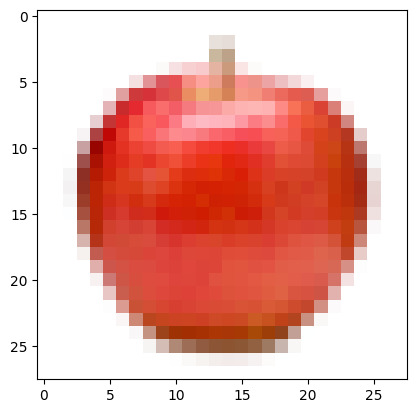

raw data


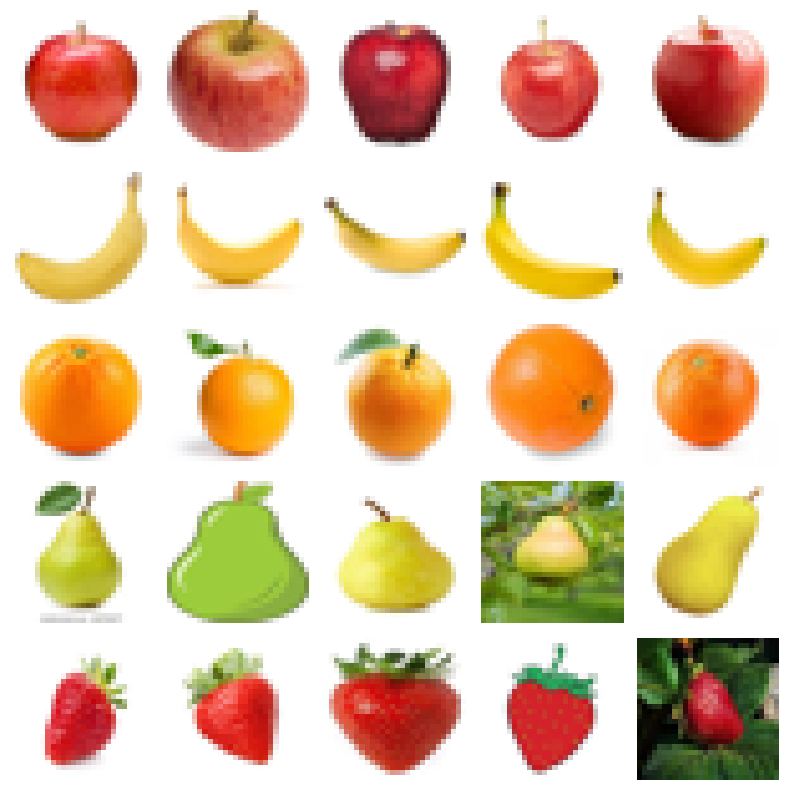

center


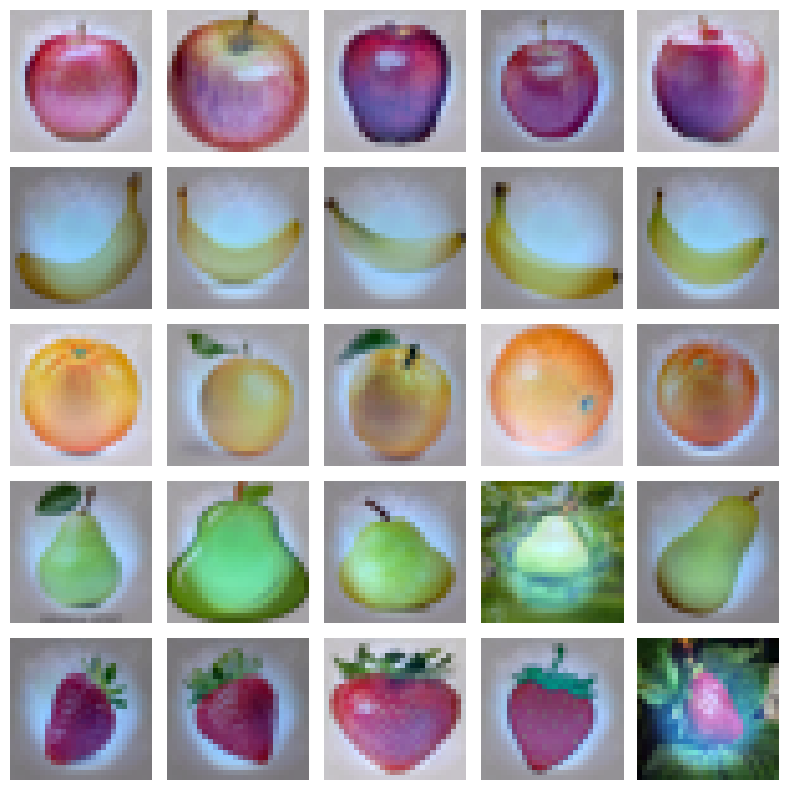

standardize


In [375]:
numpyArr = np.load("samples.npy")
PlotSample(numpyArr, 0) #one raw sample of the collected data
print("raw data")
plot_images_in_grid(numpyArr)
print("center")
plot_images_in_grid(center(numpyArr))
print("standardize")
plot_images_in_grid(standardize(numpyArr))
print("whiten")
plot_images_in_grid(whitening(numpyArr))

In [ ]:
(Xtr, Ltr), (X_test, L_test)=mnist.load_data()

In [ ]:
Xtr.shape

(60000, 28, 28)

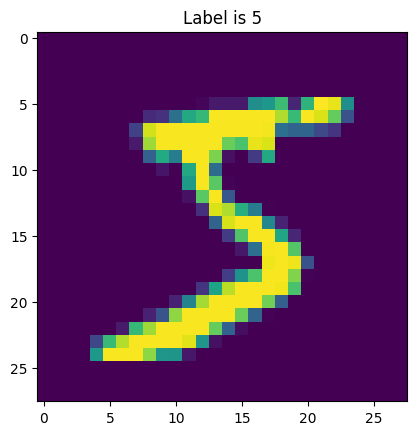

In [ ]:
Image=Xtr[0,:,:]
Label=Ltr[0]


plt.title('Label is {Label}'.format(Label=Label))
plt.imshow(Image)

plt.show()
plt.close()


C:\Users\wiklu\AppData\Local\Temp\ipykernel_21300\383047006.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0=plt.subplot(2,2,1)
C:\Users\wiklu\AppData\Local\Temp\ipykernel_21300\383047006.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1=plt.subplot(2,2,2)


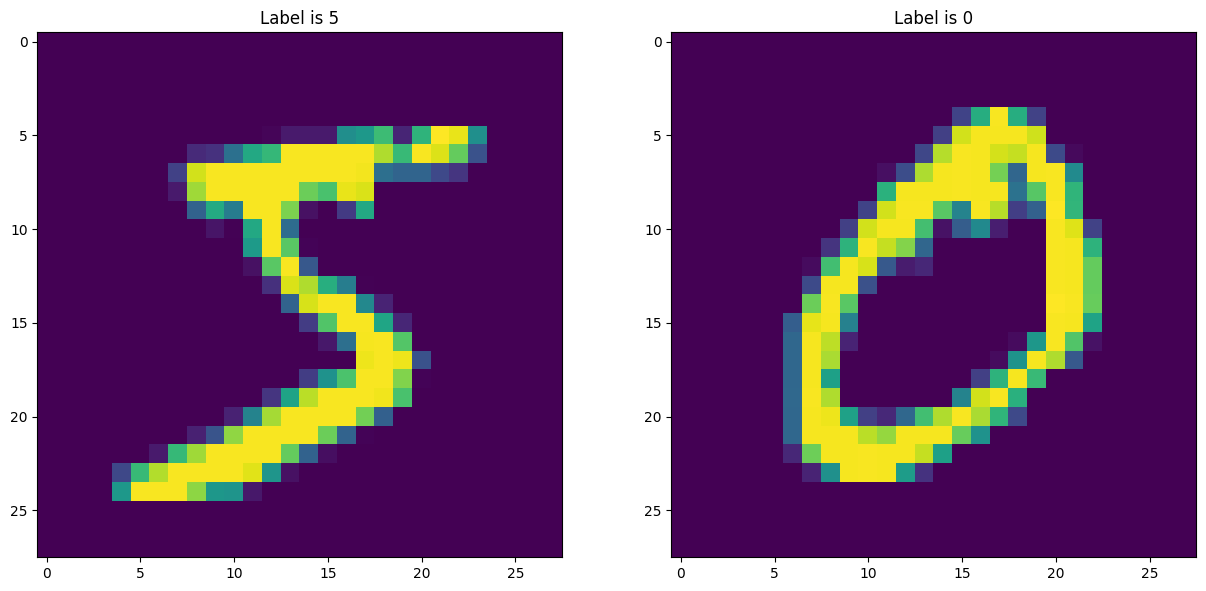

In [ ]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax0=plt.subplot(2,2,1)
ax1=plt.subplot(2,2,2)

Image=Xtr[0,:,:]
Label=Ltr[0]
Image1=Xtr[1,:,:]
Label1=Ltr[1]


ax0.set_title('Label is {Label}'.format(Label=Label))
ax0.imshow(Image)
ax1.set_title('Label is {Label}'.format(Label=Label1))
ax1.imshow(Image1)


plt.show()
plt.close()


In [ ]:
28*28

784

In [ ]:
#Traing phase
num_sample=500
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]

Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2])

#Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype()
Tr_set.shape

(500, 784)

In [ ]:
def predict(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)
        
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

In [ ]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predict(Test_images)

print("Accuracy:", np.mean(Labels_predicted==L_test))



Accuracy: 0.2649
